In [99]:
import pandas as pd 
from pylab import *

In [100]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

In [101]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [103]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [104]:
import seaborn as sns

In [105]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [106]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

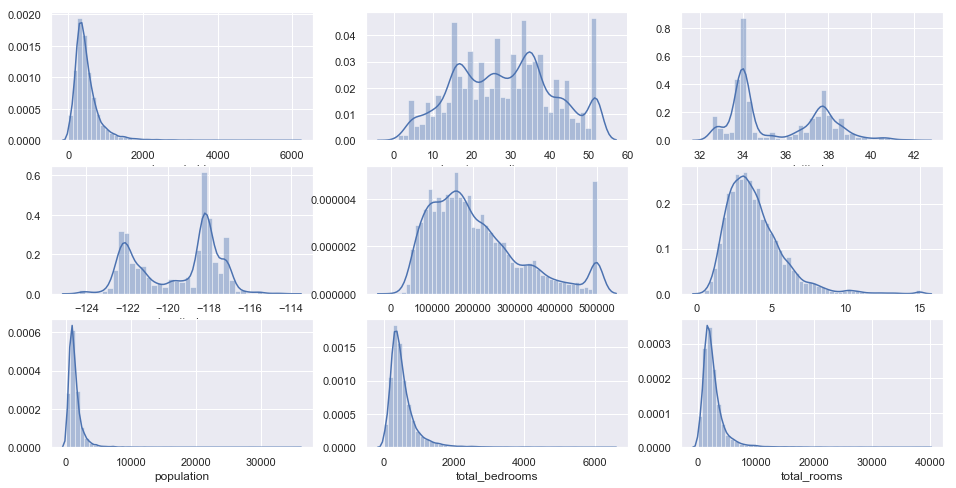

In [107]:
sns.set(rc = {"figure.figsize":(16,8)});

subplot(3,3,1)
legend = "households"
ax = sns.distplot(data["households"], label = 'households')


subplot(3,3,2)
ax = sns.distplot(data['housing_median_age'])

subplot(3,3,3)
ax = sns.distplot(data['latitude'])

subplot(3,3,4)
ax = sns.distplot(data['longitude'])

subplot(3,3,5)
ax = sns.distplot(data['median_house_value'])

subplot(3,3,6)
ax = sns.distplot(data['median_income'])

subplot(3,3,7)
ax = sns.distplot(data['population'])

subplot(3,3,8)
ax = sns.distplot(data['total_bedrooms'])

subplot(3,3,9)
ax = sns.distplot(data['total_rooms'])

plt.show()

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
data['income_cat'] = ceil(data['median_income'] / 1.5)
data['income_cat'].where(data['income_cat'] < 5, 5.0, inplace = True)

In [110]:
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

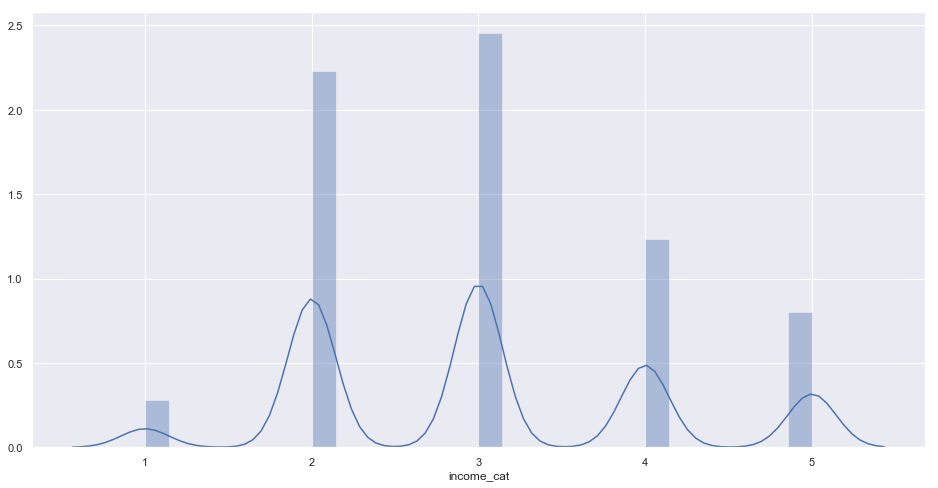

In [111]:
sns.distplot(data['income_cat'])


In [112]:
from sklearn.model_selection import StratifiedShuffleSplit

In [113]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [114]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [115]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

In [116]:
housing = strat_train_set.copy()

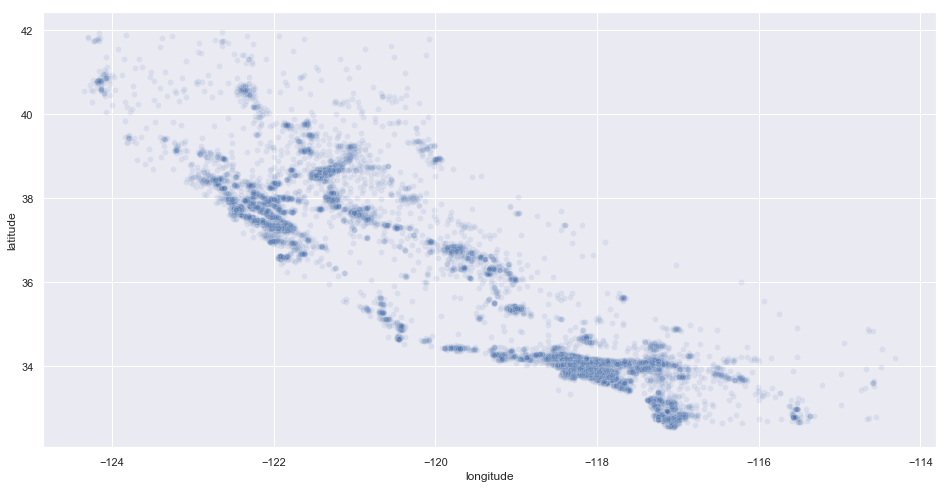

In [117]:
sns.scatterplot(data = housing, x = 'longitude', y = 'latitude', alpha = 0.1)

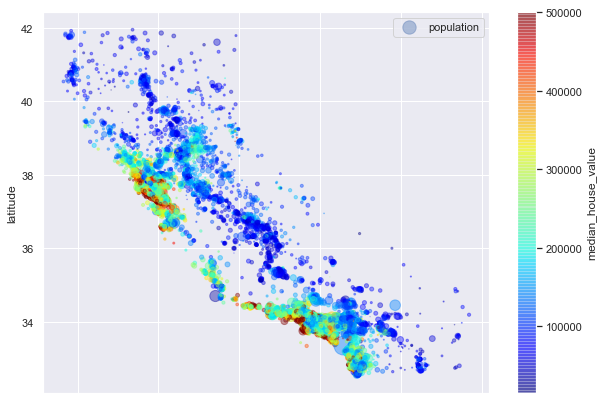

In [118]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s= housing['population']/100, label = 'population', figsize=(10,7),
            c = "median_house_value", cmap = plt.get_cmap('jet'), colorbar = True)

In [119]:
corr_matrix = housing.corr()

In [120]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [121]:
from pandas.plotting import scatter_matrix

In [122]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000011CEB37908>,
      dtype=object)

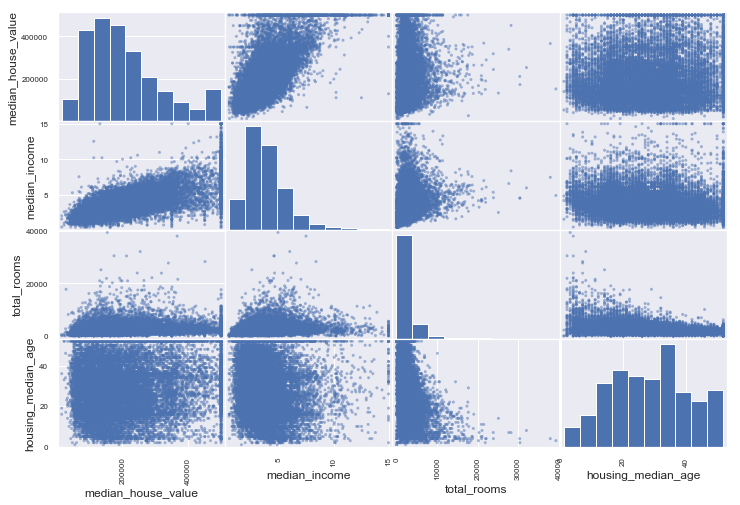

In [123]:
scatter_matrix(housing[attributes], figsize = (12,8))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


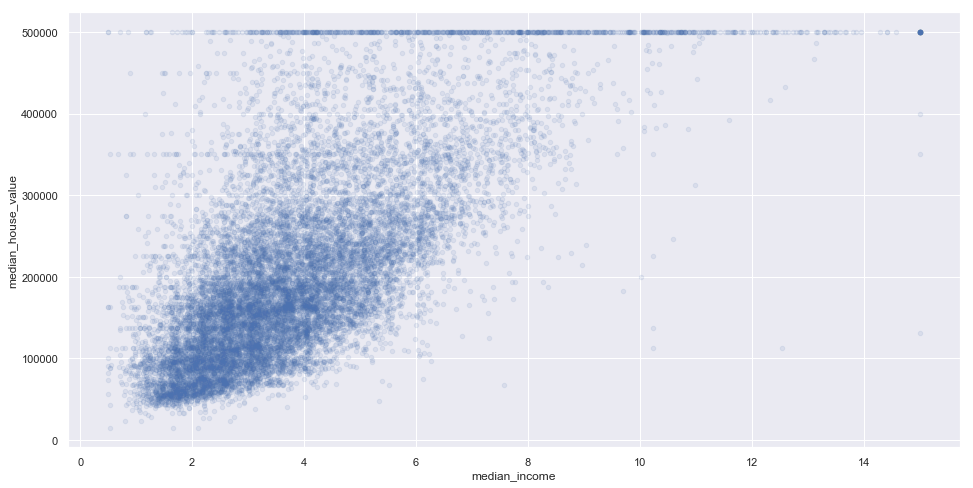

In [124]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

In [125]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [126]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [127]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [128]:
from sklearn.preprocessing import Imputer

In [129]:
imputer = Imputer(strategy = 'median')

C:\Users\Bia\Anaconda2\envs\opencv-env\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [130]:
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [131]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [132]:
x = imputer.transform(housing_num)

In [133]:
housing_tr = pd.DataFrame(x, columns = housing_num.columns)

In [134]:
housing_cat = housing['ocean_proximity']

In [135]:
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

### Transformando categorias de texto em categorias de inteiros atraves do factorize do pandas

In [136]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [137]:
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [138]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

### Transformando categorias de texto em categorias de inteiros atraves do LabelEncoder do sklearn

In [139]:
from sklearn import preprocessing

In [140]:
labelencoder = preprocessing.LabelEncoder() 
housing_cat_encoded2 = labelencoder.fit_transform(housing_cat)
housing_cat_encoded2[:10]
labelencoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

### Transformando categorias de inteiros para vetores one-hot

In [141]:
from sklearn.preprocessing import OneHotEncoder

In [142]:
encoder = OneHotEncoder()

In [143]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded2.reshape(-1,1))

C:\Users\Bia\Anaconda2\envs\opencv-env\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [144]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [145]:
housing['categorias'] = housing_cat_1hot

In [146]:
housing_cat_1hot_array = housing_cat_1hot.toarray()

### Customizando transformadores


In [147]:
from sklearn.base import BaseEstimator, TransformerMixin

In [148]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [149]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y =None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

### Utilizando pipelines 

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [151]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy = 'median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ])

C:\Users\Bia\Anaconda2\envs\opencv-env\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [152]:

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [153]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X[self.attribute_names].values.ravel()

In [154]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


In [155]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy = 'median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ])

C:\Users\Bia\Anaconda2\envs\opencv-env\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [156]:
from sklearn.compose import ColumnTransformer

In [157]:
full_pipeline = ColumnTransformer([ 
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

In [158]:
housing_prepared = full_pipeline.fit_transform(housing)

C:\Users\Bia\Anaconda2\envs\opencv-env\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [159]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Aplicando os modelos

#### Regressao Linear

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lin_reg = LinearRegression()

In [162]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = housing_prepared[:5]

In [164]:
print('Predictions: ', lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [165]:
print('Labels: ', list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [166]:
from sklearn.metrics import mean_squared_error

In [167]:
housing_predictions = lin_reg.predict(housing_prepared)

In [168]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

#### Decision Tree

In [169]:
from sklearn.tree import DecisionTreeRegressor

In [170]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [171]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

In [174]:
tree_rmse_scores = np.sqrt(-scores)

In [175]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())


In [176]:
display_scores(tree_rmse_scores)

Scores [67938.88089899 67068.87612534 70653.63040438 70500.09299866
 69909.89959295 73456.25733326 70959.36647411 70556.77124088
 77805.19152128 69203.39036813]
Mean 70805.23569579785
Standard Deviation 2859.594241235096


In [177]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)

In [178]:
lin_reg_rmse_scores = np.sqrt(-lin_scores)

In [179]:
display_scores(lin_reg_rmse_scores)

Scores [66756.89288533 66963.71866078 70347.95244419 74752.93602822
 68031.13388938 71204.4762852  64967.81468897 68273.02578122
 71552.91566558 67661.80150892]
Mean 69051.2667837788
Standard Deviation 2737.855325840758


In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
forest_reg = RandomForestRegressor()

In [182]:
forest_reg.fit(housing_prepared, housing_labels)

C:\Users\Bia\Anaconda2\envs\opencv-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [183]:
forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

In [184]:
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)

In [185]:
display_scores(forest_reg_rmse_scores)

Scores [52438.47914672 49408.11057764 52635.9828848  54357.22639969
 52069.04391294 54980.18086119 51280.20081528 50544.73091716
 56038.47401069 53680.04518988]
Mean 52743.24747159807
Standard Deviation 1949.383630812904


In [190]:
from sklearn.model_selection import GridSearchCV

In [187]:
param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]

In [188]:
forest_reg = RandomForestRegressor()

In [191]:
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')

In [192]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [193]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [194]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [196]:
cvres = grid_search.cv_results_

In [197]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63378.39084438825 {'max_features': 2, 'n_estimators': 3}
55870.76041296694 {'max_features': 2, 'n_estimators': 10}
52596.38787506624 {'max_features': 2, 'n_estimators': 30}
60020.025511505926 {'max_features': 4, 'n_estimators': 3}
52879.6999828735 {'max_features': 4, 'n_estimators': 10}
50323.51349437409 {'max_features': 4, 'n_estimators': 30}
59519.44442897725 {'max_features': 6, 'n_estimators': 3}
52115.411410501976 {'max_features': 6, 'n_estimators': 10}
50196.07290524507 {'max_features': 6, 'n_estimators': 30}
58568.679616677095 {'max_features': 8, 'n_estimators': 3}
51900.514081451074 {'max_features': 8, 'n_estimators': 10}
49979.927600457515 {'max_features': 8, 'n_estimators': 30}
62953.96253817745 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55206.52047240989 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58781.92842984125 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52134.31078992312 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [198]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [199]:
feature_importances

array([6.90967568e-02, 5.88916146e-02, 4.42697418e-02, 1.50904842e-02,
       1.45232185e-02, 1.42960654e-02, 1.47187926e-02, 3.86001700e-01,
       4.58780124e-02, 1.13119395e-01, 5.38397244e-02, 6.74578934e-03,
       1.54312328e-01, 1.59020280e-05, 4.37322838e-03, 4.82724665e-03])

In [202]:
sorted(zip(feature_importances, housing.columns), reverse = True)

[(0.3860016999080284, 'median_income'),
 (0.11311939495043356, 'categorias'),
 (0.06909675679549472, 'longitude'),
 (0.058891614578550855, 'latitude'),
 (0.04587801237431654, 'ocean_proximity'),
 (0.04426974184606724, 'housing_median_age'),
 (0.015090484165478256, 'total_rooms'),
 (0.014718792637539085, 'households'),
 (0.014523218466689782, 'total_bedrooms'),
 (0.014296065376309525, 'population')]

In [206]:
final_model = grid_search.best_estimator_

In [222]:
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(final_prediction, y_test)
rmse = np.sqrt(final_mse)
print(rmse)

47780.902270302235
